In [13]:
#connect to s3 with the sdk
from boto.s3.connection import S3Connection
from PIL import Image 
import webbrowser
import datetime
import boto3
from boto.s3.key import Key

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
client = boto3.client('rekognition', 'us-east-1')
%matplotlib inline

#You must change these to your own password and bucket information.
conn = S3Connection()

from matplotlib.pyplot import imshow
import json
from pprint import pprint

%matplotlib inline
import matplotlib
matplotlib.rc("savefig", dpi=100)
import cv2
from collections import namedtuple

print ('done')

done


In [18]:
#print the bucket name and contents
mybuckets = conn.get_all_buckets()
print(len(mybuckets))
print(mybuckets[1])

print ('print info about this bucket')
#this bucket is read-public, so feel free to follow this example code without changing 
#anything besides public/private key
#bucketname='rekognitionbotoartifact'
bucketname='my-bucket-glen-c-2'
s3bucket = conn.get_bucket(bucketname)
print(s3bucket)
size = 0
count = 0
for key in s3bucket.list():
    size += key.size
    count += 1
 
print ("%.3f GB" % (size*1.0/1024/1024/1024))
print ("num files: "+str(count))

for key in s3bucket.list():
        print ("{name}\t{size}\t{modified}".format(
                name = key.name,
                size = key.size,
                modified = key.last_modified,
                ))

2
<Bucket: my-bucket-glen-c-2>
print info about this bucket
<Bucket: my-bucket-glen-c-2>
0.040 GB
num files: 9
2006_volkswagen_golf_used_3855900_1_l.jpg	67529	2017-09-19T10:33:56.000Z
2006_volkswagen_golf_used_3855900_3_l.jpg	93268	2017-09-19T10:33:53.000Z
2006_volkswagen_golf_used_3855900_4_l.jpg	77822	2017-09-19T10:33:55.000Z
P1030889.JPG	7294464	2017-09-19T10:32:24.000Z
P1040097.JPG	7286784	2017-09-19T10:32:59.000Z
P1040225.JPG	6757376	2017-09-19T10:33:18.000Z
P1040265.JPG	6774784	2017-09-19T10:33:36.000Z
P1050322.JPG	7268352	2017-09-19T10:33:58.000Z
P1050367.JPG	7234560	2017-09-19T10:34:16.000Z


In [16]:
#a demo of looping over a s3 bucket. printing out the MTCNN and the num_faces 
#from rekognition's api. Looking at printed output gives interesting results about errors
#coming from both sides. Errors are few though, and are usually worth taking in exchange
#for the cost savings
import commands
count=0
failcount=0
        
for key in s3bucket.list():
    #use this line to control how many loops
    if count==50:
        break
    count += 1
    if ((count % 100) == 0):
        print ('at count: '+str(count)+'\n')
        
    print(key.name)
    try:
        
        response = client.detect_labels(
            Image={
                'S3Object': {
                #marinus will need to change the bucket name to whichever they want to use
                'Bucket': bucketname,
                'Name': key.name
            }
        },
            MaxLabels = 5,
            MinConfidence = 65,
        )
        
        #version 1: get ground truth from rekognition api
        num_api_labels=len(response['Labels'])
        print('Rekognition labels detected count: '+str(num_api_labels))
        for res in response['Labels']:
            print("Identified "+res['Name']+" with confidence level of "+str(res['Confidence']))
        
        print('')
    except:
        print ('failed on: '+key.name)
        print('')
        failcount=(failcount+1)
        
print('fail count '+str(failcount))
print('total number of photos processed '+str(count))

2006_volkswagen_golf_used_3855900_1_l.jpg
Rekognition labels detected count: 4
Identified Automobile with confidence level of 77.4955596924
Identified Car with confidence level of 77.4955596924
Identified Vehicle with confidence level of 77.4955596924
Identified Sedan with confidence level of 76.3027267456

2006_volkswagen_golf_used_3855900_3_l.jpg
Rekognition labels detected count: 5
Identified Automobile with confidence level of 97.6886672974
Identified Car with confidence level of 97.6886672974
Identified Vehicle with confidence level of 97.6886672974
Identified Suv with confidence level of 83.001373291
Identified Sedan with confidence level of 77.5230026245

2006_volkswagen_golf_used_3855900_4_l.jpg
Rekognition labels detected count: 5
Identified Roof Rack with confidence level of 98.9120864868
Identified Automobile with confidence level of 96.3414382935
Identified Car with confidence level of 96.3414382935
Identified Vehicle with confidence level of 96.3414382935
Identified Suv wi

P1040265.JPG


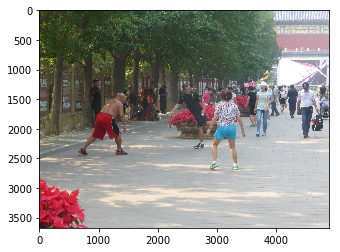

In [17]:
#retrieve and print a selected image
image='P1040265.JPG'.replace('+',' ')
print (image)
#make sure that you have the folder path in whatever instance is running this code
folder='/home/ubuntu/MTCNN-face-filter'
temp_image=folder+'temp_image.png'

key = s3bucket.get_key(image)
#use the same file name for each temp image or you will start getting a ton of photos 
#stored in the folder
#also, if you are using your own bucket, you may need to tweak this code to handle '/'s
key.get_contents_to_filename(temp_image)                                                                  
pil_im = Image.open(temp_image, 'r')
imshow(np.asarray(pil_im))